# Customer Churn Data Analysis and Prediction
Analyzing Storepro customer trends and predicting customer churn on the individual level

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
os.chdir('/kaggle/input/ecomm-customer-dataset')
os.listdir()

['storepro_labeldict.csv', 'storepro_data.csv']

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [3]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import backend as K  

In [4]:
info = pd.read_csv('storepro_labeldict.csv')
print('Fields information')
display(info)
data = pd.read_csv('storepro_data.csv')
print("Data:")
display(data)

Fields information


,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


Data:


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


## Data Cleaning

In [5]:
# Data overview
overview = pd.concat((data.isnull().sum(),data.nunique(),data.dtypes), axis=1, keys=['Null Counts','Cardinality','DType'])
overview

,Null Counts,Cardinality,DType
CustomerID,0,5630,int64
Churn,0,2,int64
Tenure,264,36,float64
PreferredLoginDevice,0,3,object
CityTier,0,3,int64
WarehouseToHome,251,34,float64
PreferredPaymentMode,0,7,object
Gender,0,2,object
HourSpendOnApp,255,6,float64
NumberOfDeviceRegistered,0,6,int64


> **Null fields and their intutive resolution:**
> * Tenure(264 null fields): update all null values to 0 (as null tenure is equivalent to no tenure)
> * Use Interpolation on rest of the fields containing null values

In [6]:
# update null values in 'Tenure' to 0 and apply linear interpolation on the rest
data.Tenure.fillna(value=0, inplace=True)
data.interpolate(method='linear', inplace=True)
overview = pd.concat((data.isnull().sum(),data.nunique(),data.dtypes), axis=1, keys=['Null Counts','Cardinality','DType'])
overview

,Null Counts,Cardinality,DType
CustomerID,0,5630,int64
Churn,0,2,int64
Tenure,0,36,float64
PreferredLoginDevice,0,3,object
CityTier,0,3,int64
WarehouseToHome,0,67,float64
PreferredPaymentMode,0,7,object
Gender,0,2,object
HourSpendOnApp,0,12,float64
NumberOfDeviceRegistered,0,6,int64


## Exploratory Data Analysis

#### Customer Overview

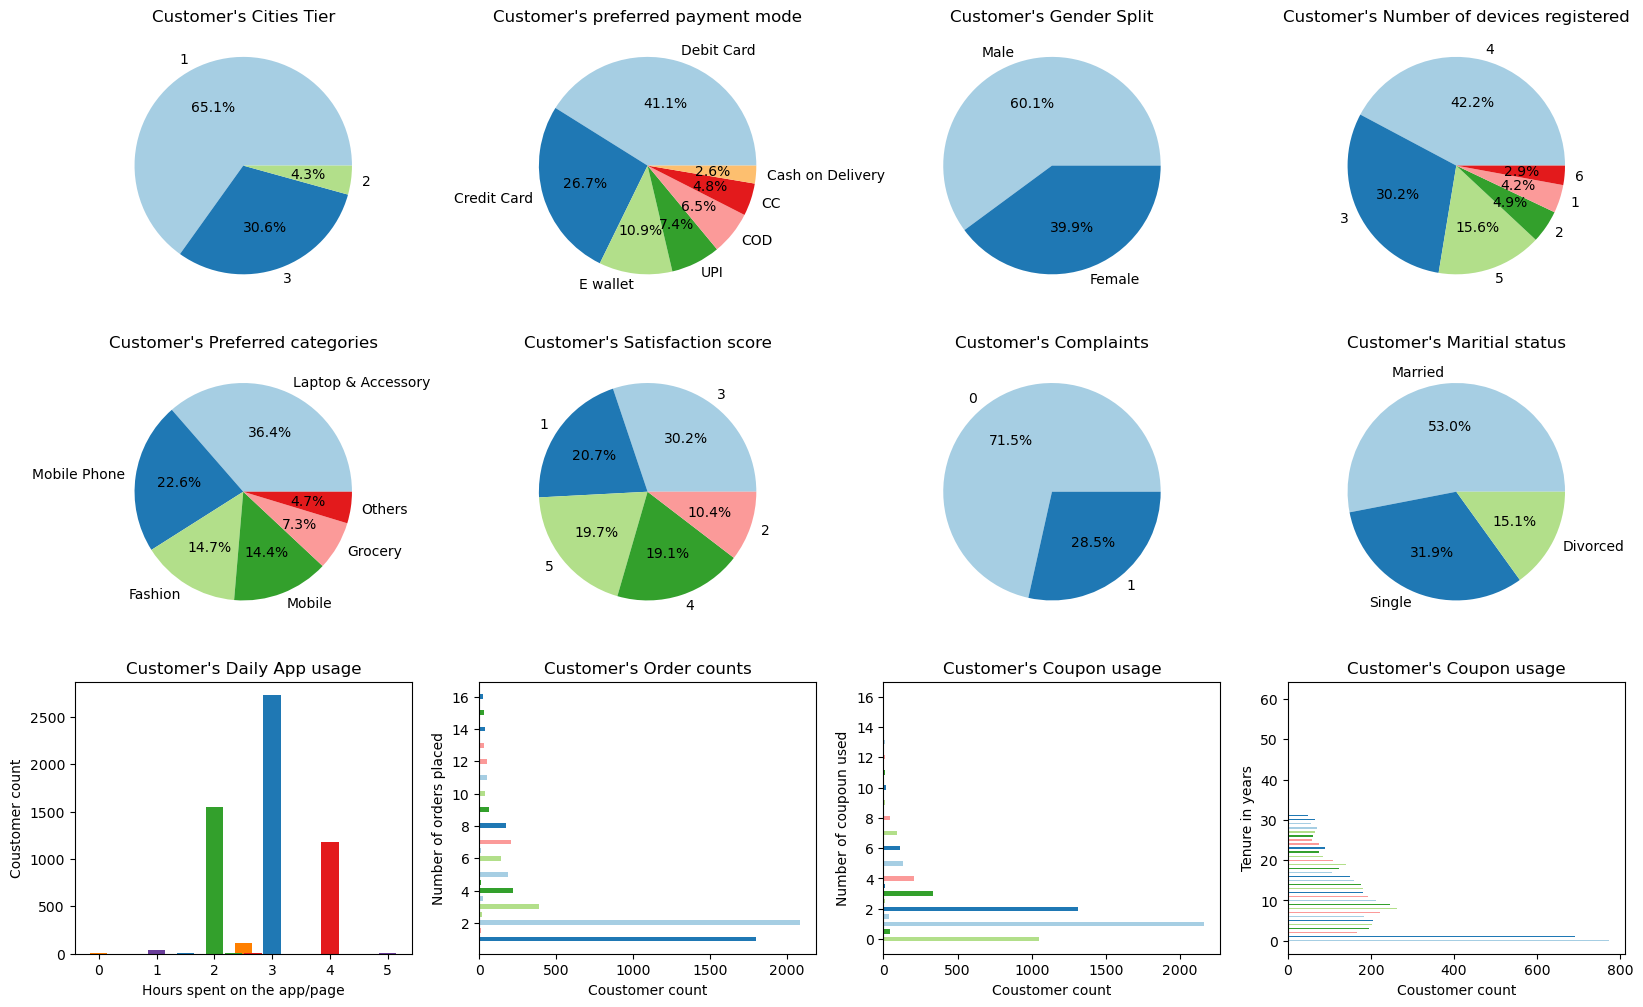

In [7]:
plt.subplots(figsize=(20,12))
plt.subplot(3,4,1)
plt.pie(data.CityTier.value_counts().values, labels=data.CityTier.value_counts().index, 
        autopct='%.1f%%', colors=plt.cm.Paired(np.arange(0,10)))
plt.title("Customer's Cities Tier")
plt.subplot(3,4,2)
plt.pie(data.PreferredPaymentMode.value_counts().values, labels=data.PreferredPaymentMode.value_counts().index, 
        autopct='%.1f%%', colors=plt.cm.Paired(np.arange(0,10)))
plt.title("Customer's preferred payment mode")
plt.subplot(3,4,3)
plt.pie(data.Gender.value_counts().values, labels=data.Gender.value_counts().index, 
        autopct='%.1f%%', colors=plt.cm.Paired(np.arange(0,10)))
plt.title("Customer's Gender Split")
plt.subplot(3,4,4)
plt.pie(data.NumberOfDeviceRegistered.value_counts().values, labels=data.NumberOfDeviceRegistered.value_counts().index, 
        autopct='%.1f%%', colors=plt.cm.Paired(np.arange(0,10)))
plt.title("Customer's Number of devices registered")
plt.subplot(3,4,5)
plt.pie(data.PreferedOrderCat.value_counts().values, labels=data.PreferedOrderCat.value_counts().index, 
        autopct='%.1f%%', colors=plt.cm.Paired(np.arange(0,10)))
plt.title("Customer's Preferred categories")
plt.subplot(3,4,6)
plt.pie(data.SatisfactionScore.value_counts().values, labels=data.SatisfactionScore.value_counts().index, 
        autopct='%.1f%%', colors=plt.cm.Paired(np.arange(0,10)))
plt.title("Customer's Satisfaction score")
plt.subplot(3,4,7)
plt.pie(data.Complain.value_counts().values, labels=data.Complain.value_counts().index, 
        autopct='%.1f%%', colors=plt.cm.Paired(np.arange(0,10)))
plt.title("Customer's Complaints")
plt.subplot(3,4,8)
plt.pie(data.MaritalStatus.value_counts().values, labels=data.MaritalStatus.value_counts().index, 
        autopct='%.1f%%', colors=plt.cm.Paired(np.arange(0,10)))
plt.title("Customer's Maritial status")
plt.subplot(3,4,9)
plt.bar(data.HourSpendOnApp.value_counts().index, data.HourSpendOnApp.value_counts().values, 
        width=0.3, color=plt.cm.Paired(np.array([1,3,5,7,9])))
plt.title("Customer's Daily App usage")
plt.ylabel('Coustomer count')
plt.xlabel('Hours spent on the app/page')
plt.subplot(3,4,10)
plt.barh(data.OrderCount.value_counts().index, data.OrderCount.value_counts().values, color=plt.cm.Paired(np.arange(5)), height=0.3)
plt.title("Customer's Order counts")
plt.xlabel('Coustomer count')
plt.ylabel('Number of orders placed')
plt.subplot(3,4,11)
plt.barh(data.CouponUsed.value_counts().index, data.CouponUsed.value_counts().values, color=plt.cm.Paired(np.arange(5)), height=0.3)
plt.title("Customer's Coupon usage")
plt.xlabel('Coustomer count')
plt.ylabel('Number of coupoun used')
plt.subplot(3,4,12)
plt.barh(data.Tenure.value_counts().index, data.Tenure.value_counts().values, color=plt.cm.Paired(np.arange(5)), height=0.3)
plt.title("Customer's Coupon usage")
plt.xlabel('Coustomer count')
plt.ylabel('Tenure in years')

plt.show()

## Preprocessing

<Axes: >

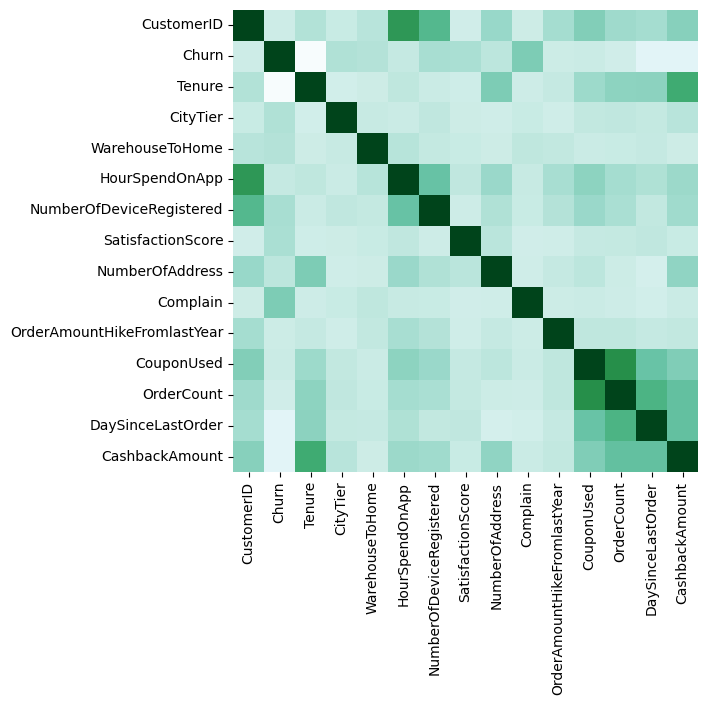

In [8]:
plt.figure(figsize=(6,6))
sns.heatmap(data.corr(),cbar=False, cmap='BuGn')

### Redundant features:
CouponUsed, CustomerID, PreferredLoginDevice, OrderAmountHikeFromlastYear, NumberOfAddress

In [9]:
data.drop(columns=['CouponUsed','CustomerID','PreferredLoginDevice','OrderAmountHikeFromlastYear','NumberOfAddress'], inplace=True)
data

,Churn,Tenure,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,1,1.0,5.0,160
1,1,0.0,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,1,1.0,0.0,121
2,1,0.0,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,1,1.0,3.0,120
3,1,0.0,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,0,1.0,3.0,134
4,1,0.0,1,12.0,CC,Male,2.5,3,Mobile,5,Single,0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,0,2.0,4.0,151
5626,0,13.0,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,0,2.0,4.0,225
5627,0,1.0,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,1,2.0,4.0,186
5628,0,23.0,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,0,2.0,9.0,179


### Label Encoding

In [10]:
data.MaritalStatus.value_counts()

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64

In [11]:
data.SatisfactionScore.unique()

array([2, 3, 5, 4, 1])

In [12]:
gender_dict = {'Female':0, 'Male':1}
payment_dict = {'Debit Card':0, 'Credit Card':1, 'E wallet':2, 'UPI':3, 'COD':4, 'CC':5, 'Cash on Delivery':6}
category_dict = {'Laptop & Accessory':0, 'Mobile Phone':1, 'Fashion':2, 'Mobile':3, 'Grocery':4, 'Others':5}
status_dict = {'Married':0, 'Single':1, 'Divorced':2}

data.Gender = data.Gender.map(gender_dict)
data.PreferredPaymentMode = data.PreferredPaymentMode.map(payment_dict)
data.PreferedOrderCat = data.PreferedOrderCat.map(category_dict)
data.MaritalStatus = data.MaritalStatus.map(status_dict)

data

,Churn,Tenure,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,3,6.0,0,0,3.0,3,0,2,1,1,1.0,5.0,160
1,1,0.0,1,8.0,3,1,3.0,4,3,3,1,1,1.0,0.0,121
2,1,0.0,1,30.0,0,1,2.0,4,3,3,1,1,1.0,3.0,120
3,1,0.0,3,15.0,0,1,2.0,4,0,5,1,0,1.0,3.0,134
4,1,0.0,1,12.0,5,1,2.5,3,3,5,1,0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,1,30.0,1,1,3.0,2,0,1,0,0,2.0,4.0,151
5626,0,13.0,1,13.0,1,1,3.0,5,2,5,0,0,2.0,4.0,225
5627,0,1.0,1,11.0,0,1,3.0,2,0,4,0,1,2.0,4.0,186
5628,0,23.0,3,9.0,1,1,4.0,5,0,4,0,0,2.0,9.0,179


# Model 1: Churn Predictor(Binary Classification model)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns=['Churn']),data.Churn, test_size=0.2, random_state=42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4504, 14) (1126, 14) (4504,) (1126,)


In [14]:
display(x_train)

,Tenure,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,OrderCount,DaySinceLastOrder,CashbackAmount
4478,1.0,1,12.0,0,0,3.0,4,1,4,1,1,2.0,3.0,150
3685,17.0,1,13.0,1,0,4.0,5,0,3,1,1,2.0,9.0,166
731,0.0,1,9.0,0,1,2.0,4,3,3,1,0,1.0,2.0,130
291,0.0,1,8.0,0,1,2.0,3,1,2,2,1,1.0,0.0,117
184,4.0,1,11.0,4,1,2.0,3,1,2,2,1,1.0,3.0,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1.0,1,27.0,0,1,4.0,4,0,3,1,0,2.0,3.0,148
5191,10.0,3,16.0,2,1,3.0,4,2,1,0,0,5.0,5.5,226
5226,7.0,1,11.0,1,0,3.0,5,1,4,0,0,2.0,3.0,163
5390,1.0,1,36.0,1,1,4.0,4,1,5,0,0,2.0,3.0,164


In [15]:
score = {}

In [16]:
log = LogisticRegression(penalty='l2', solver='liblinear')
log.fit(x_train,y_train)

log_score = log.score(x_test,y_test)
score['logistic regression'] = log_score
print(log_score)

0.8863232682060391


In [17]:
svm = SVC()
svm.fit(x_train,y_train)

svm_score = svm.score(x_test,y_test)
score['svm'] = svm_score
print(svm_score)

0.8357015985790408


In [18]:
dt = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=20, random_state=12)
dt.fit(x_train,y_train)

dt_score = dt.score(x_test,y_test)
score['decision tree'] = dt_score
print(dt_score)

0.9609236234458259


In [19]:
rf = RandomForestClassifier(n_estimators=100, max_depth=20, criterion='entropy', random_state=12)
rf.fit(x_train,y_train)

rf_score = rf.score(x_test,y_test)
score['random forest'] = rf_score
print(rf_score)

0.9653641207815276


In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

knn_score = knn.score(x_test,y_test)
score['knn'] = knn_score
print(knn_score)

0.8650088809946714


In [21]:
nb = MultinomialNB()
nb.fit(x_train,y_train)

nb_score = nb.score(x_test,y_test)
score['naive bayes'] = nb_score
print(nb_score)

0.7646536412078153


In [22]:
xgb = XGBClassifier(n_estimators=500, eta=1)
xgb.fit(x_train,y_train)

xgb_score = xgb.score(x_test,y_test)
score['xg boost'] = xgb_score
print(xgb_score)

0.9804618117229129


In [23]:
result_df = []
for model,score in score.items():
    result_df.append([model,score])
    
result_df = pd.DataFrame(result_df, columns=['Model','Val Score'])
result_df = result_df.style
result_df = result_df.highlight_max(subset=['Val Score'], color = 'lightgreen')
result_df = result_df.highlight_min(subset=['Val Score'], color = 'pink')
display(result_df)

,Model,Val Score
0,logistic regression,0.886323
1,svm,0.835702
2,decision tree,0.960924
3,random forest,0.965364
4,knn,0.865009
5,naive bayes,0.764654
6,xg boost,0.980462


In [24]:
# saving best model
os.chdir('/kaggle/working')
pickle.dump(xgb,open('churn_model.pkl','wb'))

In [25]:
x_train.head(3)

,Tenure,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,OrderCount,DaySinceLastOrder,CashbackAmount
4478,1.0,1,12.0,0,0,3.0,4,1,4,1,1,2.0,3.0,150
3685,17.0,1,13.0,1,0,4.0,5,0,3,1,1,2.0,9.0,166
731,0.0,1,9.0,0,1,2.0,4,3,3,1,0,1.0,2.0,130


# Model 2: Customer Satisfaction Predictor

In [26]:
data

,Churn,Tenure,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,3,6.0,0,0,3.0,3,0,2,1,1,1.0,5.0,160
1,1,0.0,1,8.0,3,1,3.0,4,3,3,1,1,1.0,0.0,121
2,1,0.0,1,30.0,0,1,2.0,4,3,3,1,1,1.0,3.0,120
3,1,0.0,3,15.0,0,1,2.0,4,0,5,1,0,1.0,3.0,134
4,1,0.0,1,12.0,5,1,2.5,3,3,5,1,0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,1,30.0,1,1,3.0,2,0,1,0,0,2.0,4.0,151
5626,0,13.0,1,13.0,1,1,3.0,5,2,5,0,0,2.0,4.0,225
5627,0,1.0,1,11.0,0,1,3.0,2,0,4,0,1,2.0,4.0,186
5628,0,23.0,3,9.0,1,1,4.0,5,0,4,0,0,2.0,9.0,179


In [27]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns=['Churn','SatisfactionScore']),data.SatisfactionScore, test_size=0.2, random_state=42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4504, 13) (1126, 13) (4504,) (1126,)


In [28]:
lab_dict = {1:0,2:1,3:2,4:3,5:4}
y_train_enc = y_train.map(lab_dict)
y_test_enc = y_test.map(lab_dict)

xgb2 = XGBClassifier(n_estimators=500, eta=1)
xgb2.fit(x_train,y_train_enc)

xgb2_score = xgb2.score(x_test,y_test_enc)
print(xgb2_score)

0.7042628774422736


In [29]:
# saving model
pickle.dump(xgb2,open('customer_satisfaction_model.pkl','wb'))

In [30]:
x_train

,Tenure,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,MaritalStatus,Complain,OrderCount,DaySinceLastOrder,CashbackAmount
4478,1.0,1,12.0,0,0,3.0,4,1,1,1,2.0,3.0,150
3685,17.0,1,13.0,1,0,4.0,5,0,1,1,2.0,9.0,166
731,0.0,1,9.0,0,1,2.0,4,3,1,0,1.0,2.0,130
291,0.0,1,8.0,0,1,2.0,3,1,2,1,1.0,0.0,117
184,4.0,1,11.0,4,1,2.0,3,1,2,1,1.0,3.0,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1.0,1,27.0,0,1,4.0,4,0,1,0,2.0,3.0,148
5191,10.0,3,16.0,2,1,3.0,4,2,0,0,5.0,5.5,226
5226,7.0,1,11.0,1,0,3.0,5,1,0,0,2.0,3.0,163
5390,1.0,1,36.0,1,1,4.0,4,1,0,0,2.0,3.0,164
